In [39]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline

data = pd.read_csv('data/police_killing.csv', engine = 'python')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
id                         2535 non-null int64
name                       2535 non-null object
date                       2535 non-null object
manner_of_death            2535 non-null object
armed                      2526 non-null object
age                        2458 non-null float64
gender                     2535 non-null object
race                       2340 non-null object
city                       2535 non-null object
state                      2535 non-null object
signs_of_mental_illness    2535 non-null bool
threat_level               2535 non-null object
flee                       2470 non-null object
body_camera                2535 non-null bool
dtypes: bool(2), float64(1), int64(1), object(10)
memory usage: 242.7+ KB


M    2428
F     107
Name: gender, dtype: int64


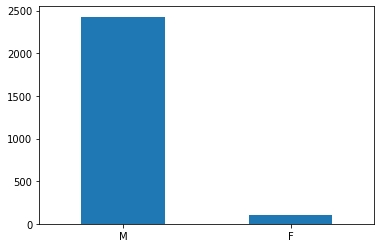

In [41]:
# 성비 대조
print(data.gender.value_counts())
data['gender'].value_counts().plot(kind='bar', rot=0)

In [42]:
# 도시 수
print('도시 수 :',len(data['city'].unique()))
print('state(주) 수 :',len(data['state'].unique()))

도시 수 : 1417
state(주) 수 : 51


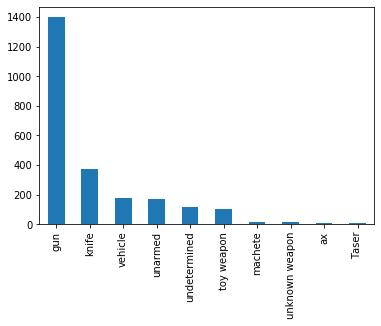

In [43]:
# 무기 소지 종류 상위 10가지
data['armed'].value_counts()[:10].plot(kind='bar')

In [44]:
# 인종 확인
data.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

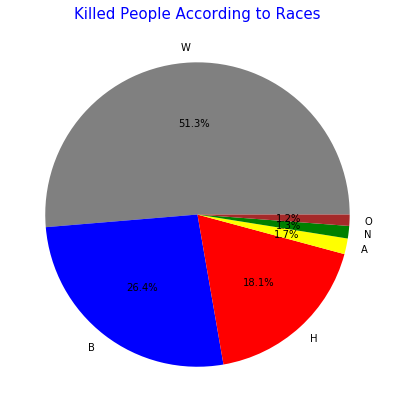

In [45]:
import matplotlib.pyplot as plt

data.race.dropna(inplace = True)
labels = data.race.value_counts().index
colors = ['grey','blue','red','yellow','green','brown']
explode = [0,0,0,0,0,0]
sizes = data.race.value_counts().values

# visual
plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Killed People According to Races',color = 'blue',fontsize = 15)

Text(0.5, 1.0, 'Age distribution')

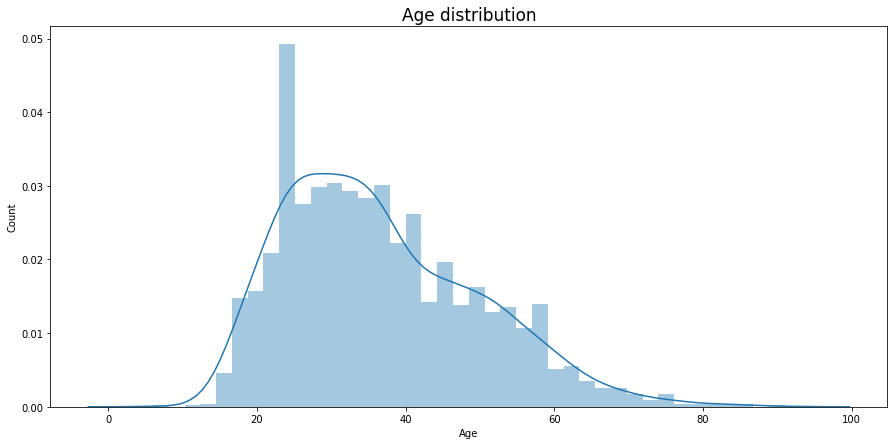

In [30]:
# 죽은 사람들 연령 분포
plt.figure(figsize=(15,7))
age_dist = sns.distplot(data.age, bins=40)
age_dist.set(xlabel="Age", ylabel="Count")

plt.title("Age distribution", fontsize=17)

C:\Users\terry\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Age distribution, by race')

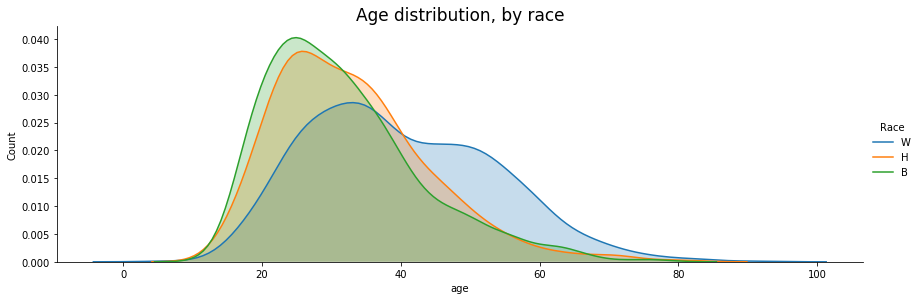

In [46]:
# 죽은 인종중 가장 많은 Blacks, Whites, Hispanics 인종 나이 분포

data = pd.read_csv('data/police_killing.csv', engine = 'python')

three_races = data.loc[(data["race"] == "B") | (data["race"] == "W") | (data["race"] == "H")]

g = sns.FacetGrid(data=three_races, hue="race", aspect=3, size=4)
g.map(sns.kdeplot, "age", shade=True)
g.add_legend(title="Race")


g.set_ylabels("Count")
plt.title("Age distribution, by race", fontsize=17)

In [62]:
# 흑인정보만 뽑아 보기
black_people = data.loc[(data.race == "B")]
black_people.drop(['race', 'id'], axis=1, inplace=True)
black_people.reset_index(drop=True, inplace=True)
black_people

,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,Leslie Sapp III,06/01/15,shot,toy weapon,47.0,M,Knoxville,PA,False,attack,Not fleeing,False
1,Ron Sneed,07/01/15,shot,gun,31.0,M,Freeport,TX,False,attack,Not fleeing,False
2,Hashim Hanif Ibn Abdul-Rasheed,07/01/15,shot,knife,41.0,M,Columbus,OH,True,other,Not fleeing,False
3,Omarr Julian Maximillian Jackson,07/01/15,shot,gun,37.0,M,New Orleans,LA,False,attack,Foot,True
4,Artago Damon Howard,08/01/15,shot,unarmed,36.0,M,Strong,AR,False,attack,Not fleeing,False
5,Marcus Golden,14/01/15,shot,vehicle,24.0,M,St. Paul,MN,False,attack,Not fleeing,False
6,Mario Jordan,14/01/15,shot,gun,34.0,M,Chesapeake,VA,True,attack,Not fleeing,False
7,Donte Sowell,15/01/15,shot,gun,27.0,M,Indianapolis,IN,False,attack,Foot,False
8,Kavonda Earl Payton,15/01/15,shot,gun,39.0,M,Aurora,CO,False,attack,Not fleeing,False
9,Terence Walker,17/01/15,shot,gun,21.0,M,Muskogee,OK,False,attack,Foot,True


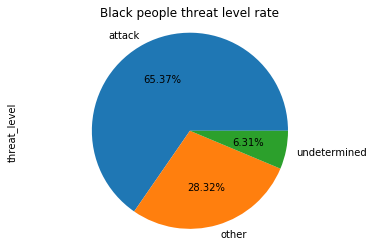

In [104]:
# 흑인 공격성 비율
black_people['threat_level'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Black people threat level rate')
plt.axis('equal')
plt.show()

In [81]:
# 흑인이 아닌 인종 분류
not_black = data.loc[(data.race != 'B')]
unarmed_not_black = not_black.loc[not_black.armed == 'unarmed']
unarmed_not_black.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
8,16,Autumn Steele,06/01/15,shot,unarmed,34.0,F,W,Burlington,IA,False,other,Not fleeing,True
62,352,Joshua Omar Garcia,26/01/15,shot,unarmed,24.0,M,H,Tahoka,TX,False,other,Car,False
71,342,Ralph Willis,29/01/15,shot,unarmed,42.0,M,W,Stillwater,OK,False,other,Foot,False
77,114,David Kassick,02/02/15,shot,unarmed,59.0,M,W,Hummelstown,PA,False,other,Foot,False


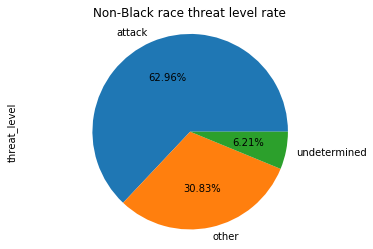

In [105]:
# 흑인 아닌 인종 공격성 비율
not_black['threat_level'].value_counts().plot.pie(autopct='%.2f%%')
plt.title('Non-Black race threat level rate')
plt.axis('equal')
plt.show()

In [87]:
print('다른 인종 unarmed 사망 비율 :', round(len(unarmed_not_black)/len(not_black)*100, 2), '%')
print('흑인 unarmed 사망 비율 :', round(len(black_people.loc[(black_people.armed == 'unarmed')])/len(black_people)*100, 2), '%')

다른 인종 unarmed 사망 비율 : 5.63 %
흑인 unarmed 사망 비율 : 10.19 %


In [ ]:
'''
백인의 경찰 총격으로 인한 사망 비율이 가장 높았지만 이것은 인종 인구수의 차이 때문으로 생각되며
흑인이나 다른 인종의 위협 정도나 장착 무기의 종류는 비슷하였지만
비교적 다른 인종에 비해 흑인의 unarmed 사망 비율이 약 5% 정도 높았다.
'''